# Module 12 Challenge
## Deliverable 2: Scrape and Analyze Mars Weather Data

In [47]:
# Import relevant libraries
from splinter import Browser
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd

In [48]:
browser = Browser('firefox')

### Step 1: Visit the Website

Use automated browsing to visit the [Mars Temperature Data Site](https://static.bc-edx.com/data/web/mars_facts/temperature.html). Inspect the page to identify which elements to scrape.

   > **Hint** To identify which elements to scrape, you might want to inspect the page by using Firefox DevTools to discover whether the table contains usable classes.


In [49]:
# Visit the website
# https://static.bc-edx.com/data/web/mars_facts/temperature.html
url = 'https://static.bc-edx.com/data/web/mars_facts/temperature.html'
browser.visit(url)

### Step 2: Scrape the Table

Create a Beautiful Soup object and use it to scrape the data in the HTML table.

Note that this can also be achieved by using the Pandas `read_html` function. However, use Beautiful Soup here to continue sharpening your web scraping skills.

In [50]:
# Create a Beautiful Soup Object
html = browser.html
soup = BeautifulSoup(html, 'html.parser')
browser.quit()

In [51]:
# Extract all rows of data
mars_html_rows = soup.find_all('tr',class_='data-row')

### Step 3: Store the Data

Assemble the scraped data into a Pandas DataFrame. The columns should have the same headings as the table on the website. Here’s an explanation of the column headings:

* `id`: the identification number of a single transmission from the Curiosity rover
* `terrestrial_date`: the date on Earth
* `sol`: the number of elapsed sols (Martian days) since Curiosity landed on Mars
* `ls`: the solar longitude
* `month`: the Martian month
* `min_temp`: the minimum temperature, in Celsius, of a single Martian day (sol)
* `pressure`: The atmospheric pressure at Curiosity's location

In [52]:
# Loop through the scraped data to create a list of rows
mars_data = [
    [value.text for value in row.find_all('td')] for row in mars_html_rows
]


In [53]:
# Create a Pandas DataFrame by using the list of rows and a list of the column names
mars_headers = [header.text for header in soup.find_all('th')]
mars_df = pd.DataFrame(mars_data,columns = mars_headers)

In [54]:
# Confirm DataFrame was created successfully
mars_df.head()

,id,terrestrial_date,sol,ls,month,min_temp,pressure
0,2,2012-08-16,10,155,6,-75.0,739.0
1,13,2012-08-17,11,156,6,-76.0,740.0
2,24,2012-08-18,12,156,6,-76.0,741.0
3,35,2012-08-19,13,157,6,-74.0,732.0
4,46,2012-08-20,14,157,6,-74.0,740.0


### Step 4: Prepare Data for Analysis

Examine the data types that are currently associated with each column. If necessary, cast (or convert) the data to the appropriate `datetime`, `int`, or `float` data types.

  > **Hint** You can use the Pandas `astype` and `to_datetime` methods to accomplish this task.


In [55]:
# Examine data type of each column
mars_df.dtypes

id                  object
terrestrial_date    object
sol                 object
ls                  object
month               object
min_temp            object
pressure            object
dtype: object

In [56]:
# Change data types for data analysis
data_types = {
    'id': int,
    'sol': int,
    'ls': int,
    'month': int,
    'min_temp': float,
    'pressure': float
}
mars_df = mars_df.astype(data_types)
mars_df['terrestrial_date'] = pd.to_datetime(mars_df['terrestrial_date'], format='%Y-%m-%d')

In [57]:
# Confirm type changes were successful by examining data types again
mars_df.dtypes

id                           int32
terrestrial_date    datetime64[ns]
sol                          int32
ls                           int32
month                        int32
min_temp                   float64
pressure                   float64
dtype: object

### Step 5: Analyze the Data

Analyze your dataset by using Pandas functions to answer the following questions:

1. How many months exist on Mars?
2. How many Martian (and not Earth) days worth of data exist in the scraped dataset?
3. What are the coldest and the warmest months on Mars (at the location of Curiosity)? To answer this question:
    * Find the average the minimum daily temperature for all of the months.
    * Plot the results as a bar chart.
4. Which months have the lowest and the highest atmospheric pressure on Mars? To answer this question:
    * Find the average the daily atmospheric pressure of all the months.
    * Plot the results as a bar chart.
5. About how many terrestrial (Earth) days exist in a Martian year? To answer this question:
    * Consider how many days elapse on Earth in the time that Mars circles the Sun once.
    * Visually estimate the result by plotting the daily minimum temperature.


In [58]:
# 1. How many months are there on Mars?
len(mars_df.month.unique())

12

In [59]:
# 2. How many Martian days' worth of data are there?
len(mars_df.sol.unique())

1867

In [60]:
# 3. What is the average low temperature by month?
month_temp = mars_df.groupby(['month'])[['min_temp']].mean()
month_temp

,min_temp
month,
1,-77.160920
2,-79.932584
3,-83.307292
4,-82.747423
5,-79.308725
6,-75.299320
7,-72.281690
8,-68.382979
9,-69.171642


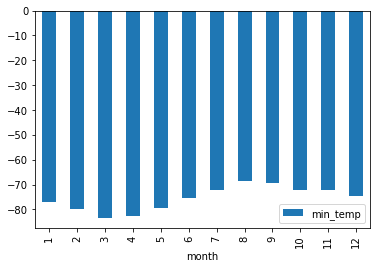

In [61]:
# Plot the average temperature by month
ax = month_temp.plot(kind='bar')

In [62]:
# Identify the coldest and hottest months in Curiosity's location
print(f'Coldest Month: {month_temp.idxmin()[0]}')
print(f'Hottest Month: {month_temp.idxmax()[0]}')

Coldest Month: 3
Hottest Month: 8


In [63]:
# 4. Average pressure by Martian month
month_pressure = mars_df.groupby(['month'])[['pressure']].mean()
month_pressure

,pressure
month,
1,862.488506
2,889.455056
3,877.322917
4,806.329897
5,748.557047
6,745.054422
7,795.105634
8,873.829787
9,913.305970


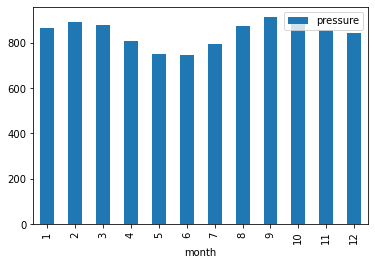

In [64]:
# Plot the average pressure by month
ax = month_pressure.plot(kind='bar')

In [65]:
# Identify the lowest and highest pressure months in Curiosity's location
print(f'Lowest Pressure Month: {month_pressure.idxmin()[0]}')
print(f'Highest Pressure Month: {month_pressure.idxmax()[0]}')

Lowest Pressure Month: 6
Highest Pressure Month: 9


The average Martian year lasts 687.0 earth days.


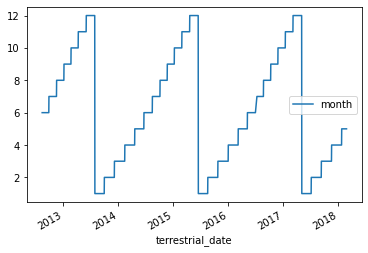

In [66]:
# 5. How many terrestrial (earth) days are there in a Martian year?
daily_temps = mars_df[['terrestrial_date','month']]
ax = daily_temps.plot(x='terrestrial_date')

# Find the terrestrial dates when Mars experiences the start of a new year.
new_years_days = []
for ind in mars_df.index:
    if mars_df['month'][ind] == 1 and mars_df['month'][ind-1] == 12:
        new_years_days.append(mars_df['terrestrial_date'][ind])

# Find the differences in earth days between consecutive Martian new years
day_diffs = []
prev_day = None
for day in new_years_days:
    if prev_day:
        day_diffs.append((day - prev_day).days)
    prev_day = day

# Calculate the average of these differences (in case the Martian year doesn't divide evenly by earth days)
average_year_length = sum(day_diffs) / len(day_diffs)
print(f'The average Martian year lasts {average_year_length} earth days.')


On average, the third month has the coldest minimum temperature on Mars, and the eighth month is the warmest. But it is always very cold there in human terms!



Atmospheric pressure is, on average, lowest in the sixth month and highest in the ninth.

The distance from new year to new year is 687 days. Internet search confirms that a Mars year is equivalent to 687 earth days. We can also see from the line plot that a Martian year lasts a little less than two earth years, which would be 730 days. 687 is about 94% of 730, so a visual estimate from the plot would likely be reasonably accurate.

### Step 6: Save the Data

Export the DataFrame to a CSV file.

In [68]:
# Write the data to a CSV
mars_df.to_csv('mars_weather.csv')